In [1]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [9]:
df = pd.read_csv('C:/Workspace/GuidedProject3/troop_movements.csv')

print(df.head(5))

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2023-10-10 10:22:32        1  resistance_soldier               empire   
1  2023-10-10 10:22:31        2        stormtrooper               empire   
2  2023-10-10 10:22:30        3             unknown           resistance   
3  2023-10-10 10:22:29        4  resistance_soldier           resistance   
4  2023-10-10 10:22:28        5               at-st           resistance   

   location_x  location_y  destination_x  destination_y homeworld  
0           1           3              1              6  Corellia  
1           9           7              8              2     Dorin  
2           6           9              9              6   Sullust  
3           7          10              5              8  Iridonia  
4           8           5              1              5   Vulpter  


In [13]:
# Create grouped data showing counts of empire vs resistance.
print(df['empire_or_resistance'].value_counts())

empire        502
resistance    498
Name: empire_or_resistance, dtype: int64


In [14]:
# Create grouped data showing counts of characters by homeworld.
print(df['homeworld'].value_counts())

Ojom            32
Corellia        31
Cerea           30
Troiken         30
Aleen Minor     30
Iridonia        30
Dagobah         30
Zolan           28
Umbara          27
Toydaria        27
Eriadu          27
Tund            27
Quermia         27
Champala        27
Muunilinst      26
Naboo           26
Bestine IV      26
Kalee           25
Mon Cala        24
Concord Dawn    24
Sullust         24
Vulpter         24
Dorin           23
Socorro         23
Alderaan        23
Ryloth          23
Mirial          22
Rodia           22
Glee Anselm     21
Shili           21
Dathomir        20
Skako           20
Trandosha       20
Iktotch         20
Chandrila       20
Serenno         19
Tholoth         19
Malastare       18
Stewjon         17
Tatooine        17
Kashyyyk        16
Haruun Kal      14
Name: homeworld, dtype: int64


In [15]:
# Created grouped data showing counts of characters by unit_type.
print(df['unit_type'].value_counts())

tie_silencer          138
at-st                 135
at-at                 134
tie_fighter           126
resistance_soldier    124
x-wing                118
unknown               116
stormtrooper          109
Name: unit_type, dtype: int64


In [17]:
# Engineer a new feature called is_resistance with a True or False value based on empire_or_resiatance.
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == 'resistance' else False)
print(df.head(5))

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2023-10-10 10:22:32        1  resistance_soldier               empire   
1  2023-10-10 10:22:31        2        stormtrooper               empire   
2  2023-10-10 10:22:30        3             unknown           resistance   
3  2023-10-10 10:22:29        4  resistance_soldier           resistance   
4  2023-10-10 10:22:28        5               at-st           resistance   

   location_x  location_y  destination_x  destination_y homeworld  \
0           1           3              1              6  Corellia   
1           9           7              8              2     Dorin   
2           6           9              9              6   Sullust   
3           7          10              5              8  Iridonia   
4           8           5              1              5   Vulpter   

   is_resistance  
0          False  
1          False  
2           True  
3           True  
4           True  


<Axes: ylabel='empire_or_resistance'>

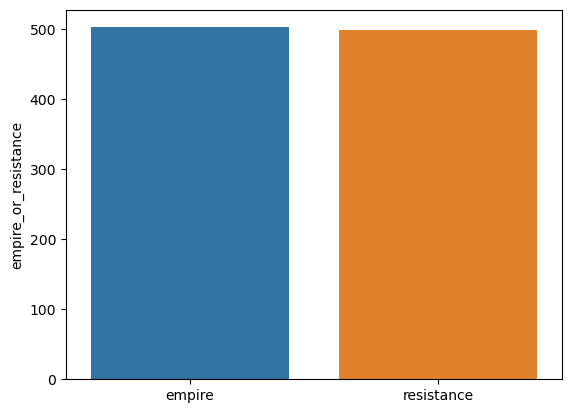

In [27]:
#Create a bar plot using Seaborn showing Empire vs Resistance distribution.
sns.barplot(x=df['empire_or_resistance'].value_counts().index, y=df['empire_or_resistance'].value_counts())

In [117]:
# Create a prediction model using sklearn.tree.DecisionTreeClassifier that predicts
# if a character is joining either the Empire or the Resistance based on their
# homeworld and unit_type.

X = df[['homeworld', 'unit_type', 'destination_x', 'location_y']]
y = df['empire_or_resistance']

X_encoded = pd.get_dummies(X)
# print(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# importance = model.feature_importances_
# feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importance})
# print(feature_importances)

0.535


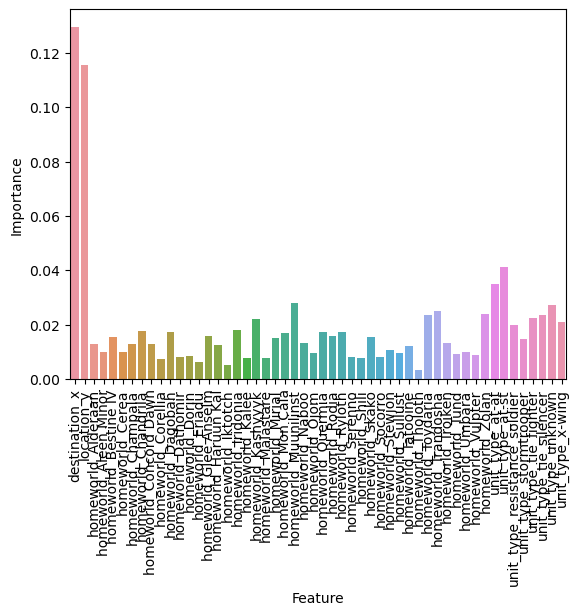

In [133]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

ax = sns.barplot(x='Feature', y='Importance', data=feature_importances)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [129]:
# Save model with pickle
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [134]:
dfMov = pd.read_csv('C:/Workspace/GuidedProject3/troop_movements10m.csv')

In [131]:
# This data must be cleaned up a bit before it can be used:
# •	Some unit_type records have a value of invalid_unit. Replace that with unknown.
# •	Some location_x and location_Y values are missing. Use the ffill method to fill.
# •	Save the clean data into a Parquet file named troop_movements10m.parquet.
# o	You need to install pyarrow and fastparquet to support saving to a Parquet file.
# pip install pyarrow
# pip install fastparquet


In [138]:
import pyarrow as pa
import fastparquet as fp

In [144]:
dfMov['unit_type'] = dfMov['unit_type'].replace('invalid_unit', 'unknown'); 

In [150]:
dfMov['location_x'] = dfMov['location_x'].ffill()
dfMov['location_y'] = dfMov['location_y'].ffill()
print(dfMov['location_x'].isna().sum())

0


In [157]:
fp.write("troop_movements10m.parquet", dfMov)

In [158]:
troop_data = pd.read_parquet('C:/Workspace/GuidedProject3/troop_movements10m.parquet')
troop_data.head(5)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst


In [163]:
# Open model with pickle
with open('C:/Workspace/GuidedProject3/trained_model.pkl', 'rb') as f:
    saved_model = pickle.load(f)

In [167]:
new_df = pd.DataFrame(troop_data)

X = new_df[['homeworld', 'unit_type', 'destination_x', 'location_y']]
X_encoded = pd.get_dummies(X)

new_predictions = saved_model.predict(X_encoded)
print(new_predictions)

['resistance' 'empire' 'resistance' ... 'resistance' 'empire' 'empire']


In [168]:
new_df['predictions'] = new_predictions
print(new_df.head(100))

              timestamp  unit_id           unit_type  location_x  location_y  \
0   2023-06-13 17:33:18        1               at-st         2.0         8.0   
1   2023-06-13 17:33:17        2        tie_silencer         4.0         4.0   
2   2023-06-13 17:33:16        3               at-at         0.0         3.0   
3   2023-06-13 17:33:15        4        tie_silencer         6.0         1.0   
4   2023-06-13 17:33:14        5         tie_fighter         0.0         4.0   
..                  ...      ...                 ...         ...         ...   
95  2023-06-13 17:31:44       96              x-wing         1.0         6.0   
96  2023-06-13 17:31:43       97  resistance_soldier         0.0         6.0   
97  2023-06-13 17:31:42       98        stormtrooper         6.0         1.0   
98  2023-06-13 17:31:41       99               at-st         3.0         4.0   
99  2023-06-13 17:31:40      100        stormtrooper         4.0         1.0   

    destination_x  destination_y    hom